## Review of Updated DP Distance Matrices

In [2]:
#Import needed libraries
import pandas as pd
import numpy as np
import random 
import os 
from ast import literal_eval
import pickle
import scipy
import math
import matplotlib.pyplot as plt 

#### Comparisons of the values and properties of the distance matrices

In [4]:
#INPUT A FOLDER WHERE BOTH THE NEW AND OLD DATA IS ALOCATED IN TWO SEPARATE FOLDERS (DATA AND NEW_DATA)

path_data_DP = r'C:\Users\julli\OneDrive\Escritorio\DP_DATA_TEST'

regions = ['Warmsen', 'Uetze', 'Hannover_92']

#Create 2 dataframes for each district and check if their # of rows are equal

df_stats_columns = ['REGION',
                    'DISTRICT',
                    'Mean NEW', 
                    'Mean OLD',
                    'MEAN NEW RATIO %',
                    'StdDv NEW',
                    'StdDv OLD',
                    'Max NEW',
                    'Max OLD']
df_stats = pd.DataFrame(columns = df_stats_columns)

check_len_list = []
check_square = []

for region in regions: 
    path_old = os.path.join(path_data_DP, 'Data', 'Instances', region, 'distances')
    path_new = os.path.join(path_data_DP, 'New_Data', 'Instances', region, 'distances')

    distance_files = []
    for filename in os.listdir(path_old):
        distance_files.append(filename)

    for file in distance_files:
         path_old_distance = os.path.join(path_old, file)
         path_new_distance = os.path.join(path_new, file)

         district_name = file[10:-4]

         df_1 = pd.read_csv(path_old_distance, sep = ',', header = None, names = ['PostPoint1', 'PostPoint2','Distance'])
         df_1['Distance'] = (df_1['Distance'] / 60)

         df_2 = pd.read_csv(path_new_distance, sep = ',', header = None, names = ['PostPoint1', 'PostPoint2','Distance'])
         df_2['Distance'] = (df_2['Distance'] / 60)

        #GET STATISTCS VALUES IN MINUTES
         mean_new = round(df_2['Distance'].mean(),1)
         mean_old = round(df_1['Distance'].mean(),1)

         mean_new_ratio = (np.round((mean_new/mean_old),2)*100)

         std_new = round(df_2['Distance'].std(),1)
         std_old = round(df_1['Distance'].std(),1)

         max_new = round(df_2['Distance'].max(),1)
         max_old = round(df_1['Distance'].max(),1)

         #min_new = round(df_2['Distance'].min(),1)
         #min_old = round(df_1['Distance'].min(),1)

         stats = [region, 
                  district_name,
                  mean_new,
                  mean_old,
                  mean_new_ratio,
                  std_new,
                  std_old,
                  max_new,
                  max_old]

         df_row = pd.DataFrame(dict(zip(df_stats_columns,stats)),index = [0])
         df_stats = pd.concat([df_stats, df_row]) 



         check_len_list.append(len(df_1) == len(df_2))
         check_square.append((math.sqrt(len(df_1)) - int(math.sqrt(len(df_1)))) == 0)



#If true everything remains the same length (no missing values compared to previous)
if all(check_len_list): 
    print('All sizes of matrices are the same as previous file, no change in length')
else: 
    print('Change in some distance matrix length')

#If true all matrices are squared (all post points matched with the rest in the district)
if all(check_square): 
    print('All matrices are squared')
else: 
    print('Some matrix DO NOT have the complete combination')



All sizes of matrices are the same as previous file, no change in length
All matrices are squared


In [6]:
#CHECK MEAN, STD DEVIATION AND MAX VALUES CHANGE BY DISTRICT 

df_stats

,REGION,DISTRICT,Mean NEW,Mean OLD,MEAN NEW RATIO %,StdDv NEW,StdDv OLD,Max NEW,Max OLD
0,Warmsen,31600-01,7.6,93.0,8.0,4.5,51.6,19.9,215.3
0,Warmsen,31600-02,5.5,51.7,11.0,3.8,29.6,14.6,156.7
0,Warmsen,31600-03,9.0,100.5,9.0,4.7,53.4,26.5,288.3
0,Warmsen,31600-04,8.6,85.0,10.0,6.2,43.8,27.9,197.9
0,Warmsen,31603-05,8.1,37.8,21.0,6.5,23.5,25.1,144.3
0,Warmsen,31603-06,7.4,60.4,12.0,5.0,55.5,20.8,261.5
0,Warmsen,31603-07,8.2,31.7,26.0,5.4,22.6,32.1,163.8
0,Warmsen,31603-08,9.0,39.0,23.0,5.7,30.8,23.8,154.1
0,Warmsen,31604-09,10.1,32.7,31.0,5.5,23.5,24.0,137.9
0,Warmsen,31604-10,8.4,50.3,17.0,4.9,37.3,24.6,165.3


In [7]:
print('OLD Average mean value per district: ', round(df_stats['Mean OLD'].mean()),2, ' minutes')


print('NEW Average mean value per district: ', round(df_stats['Mean NEW'].mean(),2), ' minutes')

print('NEW distance matrices RATIO from OLD distance matrices is aproximmately :', np.round(df_stats['Mean NEW'].mean()/df_stats['Mean OLD'].mean(),2)*100, ' %')


OLD Average mean value per district:  34 2  minutes
NEW Average mean value per district:  5.34  minutes
NEW distance matrices RATIO from OLD distance matrices is aproximmately : 16.0  %


#### Compare Objective Values for Default Tours on Old and New Data
- Objective Values obtained by computing default tour for all districts and comparing it with previous default tours
- This folder was created by running previous default tour algorithm on new data (done on a different script)

In [8]:
#READ and obtain Ojective Values from Old Defaults Routes and New Default Routes in every district of All Regions


default_folders = ['Oldcalculations', 'Recalculations']
districts = ['Hannover_92','Uetze','Warmsen']
list_defaults = []

main_path = r'C:\Users\julli\OneDrive\Escritorio\DP_DATA_TEST'

for folder in default_folders: 
    dict_defaults = {}
    for district in districts:
        dict_defaults[district] = [] 
        path_district = os.path.join(main_path, folder, district + '_Default_Routes')
        for file in os.listdir(path_district):
            if file.endswith(".txt"):
                with open(os.path.join(path_district, file), "r") as file:
                    lines = file.readlines()
                    if len(lines) >= 4:
                        fourth_line = lines[3].strip()  # Extract the 4th line (index 3) which corresponds to the Objective Value in Hours. Then remove any leading/trailing whitespace.
                        obj_value = literal_eval(fourth_line)
                        dict_defaults[district].append(obj_value)
                    else: 
                        print('ERROR file does not have this row')
    list_defaults.append(dict_defaults)


Old_Default_Routes= list_defaults[0]
New_Default_Routes = list_defaults[1]

print(Old_Default_Routes)
print(New_Default_Routes)


{'Hannover_92': [40.2, 36.4, 68.5, 82.1, 124.1, 47.9, 45.8, 54.7, 62.3, 49.5, 30.9, 32.5, 33.3, 40.6, 38.9], 'Uetze': [83.3, 136.8, 86.1, 134.4, 131.3, 67.5, 111.3, 58.3, 52.9, 71.2, 34.6, 56.4, 59.2, 105.8, 61.8, 75.6, 43.0], 'Warmsen': [215.5, 127.9, 167.2, 134.0, 64.3, 153.3, 57.4, 85.4, 98.4, 105.4, 49.8, 71.4, 74.4, 146.1]}
{'Hannover_92': [3.6, 2.4, 5.1, 5.1, 4.6, 4.5, 3.7, 5.0, 5.3, 3.7, 2.5, 2.7, 2.2, 3.4, 5.0], 'Uetze': [4.9, 5.1, 5.5, 5.8, 6.0, 3.8, 6.2, 6.8, 5.2, 5.2, 4.6, 5.7, 7.0, 6.3, 6.3, 6.8, 7.8], 'Warmsen': [7.3, 6.4, 8.8, 5.3, 6.7, 7.5, 8.5, 7.1, 8.2, 8.4, 9.4, 7.3, 6.8, 8.4]}


In [9]:
Regions_axis = list(Old_Default_Routes.keys())
print(Regions_axis)

Old_AVG_Default_Tour = []
for district in Old_Default_Routes: 
    avg_value = np.round(np.mean(Old_Default_Routes[district]),2)
    Old_AVG_Default_Tour.append(avg_value)

New_AVG_Default_Tour = []
for district in Old_Default_Routes: 
    avg_value = np.round(np.mean(New_Default_Routes[district]),2)
    New_AVG_Default_Tour.append(avg_value)

print(Old_AVG_Default_Tour)
print(New_AVG_Default_Tour)


['Hannover_92', 'Uetze', 'Warmsen']
[52.51, 80.56, 110.75]
[3.92, 5.82, 7.58]


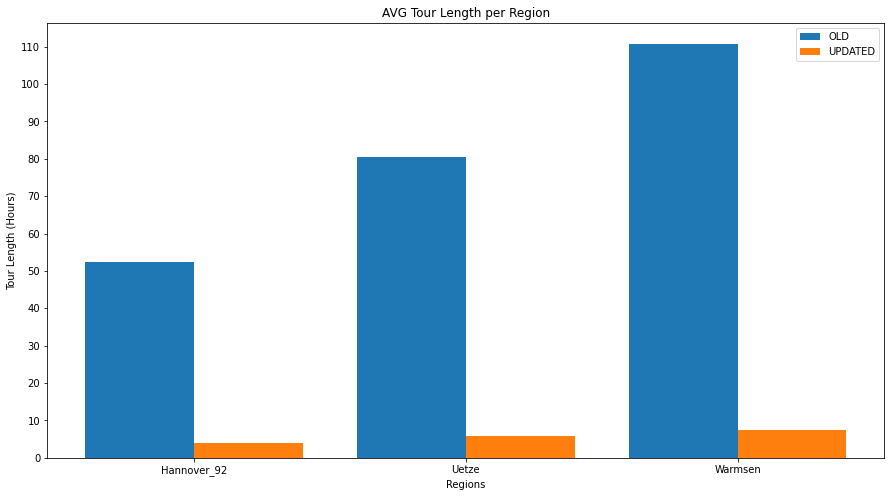

In [13]:
X_axis = np.arange(len(Regions_axis))

f, ax = plt.subplots(figsize=(15,8))
  
plt.bar(X_axis - 0.2, Old_AVG_Default_Tour, 0.4, label = 'OLD')
plt.bar(X_axis + 0.2, New_AVG_Default_Tour, 0.4, label = 'UPDATED')
  
plt.xticks(X_axis, Regions_axis)
plt.xlabel("Regions")
plt.ylabel("Tour Length (Hours)")
plt.yticks(range(0, 120, 10))
plt.title("AVG Tour Length per Region")
plt.legend()
plt.show()

#### PERCENTAGE IMPROVEMENT OF SOLVER ROUTES (DEFAULT ROUTES)

- DISTANCE MATRIX CALCULATED ON SEPARATE SCRIPT AND THEN USED AS INPUT FOR HEURISTIC SOLVER (MULTIPLICATION BY A 100 AND ROUNDING TO USE INTEGERS AND TACKLE DEVIATION)
- HEURISTIC CALCULATED SEPARATED ON OTHER SCRIPT THAT INCLUDES SOLVER GOOGLE OR (RESULTED OBTAINED ARE DIVIDED BY 100)

In [23]:
#WARMSEN DISTRICT 31600-01

Solver_31600_01 = 2527538/100

Default_31600_01 = 26290.29

print('Solver Solution in Hours: ', round((Solver_31600_01/3600),2))

print('Default Solution in Hours: ', round((Default_31600_01/3600),2))

improvement = np.round((((Default_31600_01 - Solver_31600_01)/Solver_31600_01)*100),2)

print('Cost Improvement: ', improvement, ' %')

Solver Solution in Hours:  7.02
Default Solution in Hours:  7.3
Cost Improvement:  4.02  %


In [25]:
#WARMSEN DISTRICT 31600-02

Solver_31600_02 = 2249507/100

Default_31600_02 = 23001.26

print('Solver Solution in Hours: ', round((Solver_31600_02/3600),2))

print('Default Solution in Hours: ', round((Default_31600_02/3600),2))

improvement = np.round((((Default_31600_02 - Solver_31600_02)/Solver_31600_02)*100),2)

print('Cost Improvement: ', improvement, ' %')

Solver Solution in Hours:  6.25
Default Solution in Hours:  6.39
Cost Improvement:  2.25  %


In [26]:
#UETZE DISTRICT 31311-24

Solver_31311_24 = 1851804/100

Default_31311_24 = 18881.86

print('Solver Solution in Hours: ', round((Solver_31311_24/3600),2))

print('Default Solution in Hours: ', round((Default_31311_24/3600),2))

improvement = np.round((((Default_31311_24 - Solver_31311_24)/Solver_31311_24)*100),2)

print('Cost Improvement: ', improvement, ' %')


Solver Solution in Hours:  5.14
Default Solution in Hours:  5.24
Cost Improvement:  1.96  %


In [28]:
#HANNOVER 92 DISTRICT 30457-01

Solver_30457_01 = 1240204/100

Default_30457_01 = 13060.8

print('Solver Solution in Hours: ', round((Solver_30457_01/3600),2))

print('Default Solution in Hours: ', round((Default_30457_01/3600),2))

improvement = np.round((((Default_30457_01 - Solver_30457_01)/Solver_30457_01)*100),2)

print('Cost Improvement: ', improvement, ' %')


Solver Solution in Hours:  3.45
Default Solution in Hours:  3.63
Cost Improvement:  5.31  %
